# Load files from github

In [0]:
!git clone https://github.com/siddhantmittal7/GroupTransformEquivariance.git
!pip install fire

# Load Dataset

In [0]:
!python /content/GroupTransformEquivariance/datasets.py projective_mnist --data_dir=/content/GroupTransformEquivariance/tmp/mnist/

# Model Training 

In [0]:
!python /content/GroupTransformEquivariance/experiment_mnist.py train --train_path "/content/GroupTransformEquivariance/tmp/mnist/train.pt" --valid_path "/content/GroupTransformEquivariance/tmp/mnist/valid.pt" --batch_size=10 --save_path "/content/GroupTransformEquivariance/tmp/mnist/mnist-model.pt" --tfs "[Translation,Rotation,Scale,ReflectionX,ShearX]" ----device 'cpu' 

# Load Libraries

In [0]:
import numpy as np
import torch

# Add the library to the system path
import os,sys
se2cnn_source =  os.path.join(os.getcwd(),'/content/GroupTransformEquivariance')
if se2cnn_source not in sys.path:
    sys.path.append(se2cnn_source)

from experiments import Model, Dataset
from experiment_mnist import MNISTModel
from etn import coordinates, networks, transformers
import matplotlib.pyplot as plt
from visualization import visualize_transformation

# Load trained model and validation set

In [0]:
# path to trained model
mnist_model_path = '/content/GroupTransformEquivariance/model.pt'

In [0]:
# path to validation datasets
mnist_data_path = '/content/GroupTransformEquivariance/tmp/mnist/valid.pt'

In [0]:
mnist_data = Dataset(path=mnist_data_path,
                     normalization=(
                         MNISTModel.normalization_mean, 
                         MNISTModel.normalization_std))

In [74]:
len(mnist_data)

5000

In [90]:
mnist_model = MNISTModel(load_path=mnist_model_path)

INFO:root:Projective MNIST classification
INFO:root:Loading model from file: /content/GroupTransformEquivariance/mnist-model_5.pt -- using saved model configuration
INFO:root:Transformers: Translation -> Rotation -> Scale -> ReflectionX -> ShearX
INFO:root:Pose module: EquivariantPosePredictor
INFO:root:Coordinate transformation before classification: logpolar_grid
INFO:root:Classifier architecture: BasicCNN
INFO:root:Net opts: {'nf': 32, 'p_dropout': 0.3, 'pad_mode': (None, 'cyclic'), 'pool': (True, True, False)}
INFO:root:Transformer opts: {'in_channels': 1, 'kernel_size': 3, 'nf': 32, 'strides': (2, 1)}


# Validation using the trained model

In [91]:
count = 0
for i in range(len(mnist_data)):
  prob = mnist_model.predict(mnist_data[i][0])
  values, indices = prob.max(0)
  if indices == mnist_data[i][1]:
    count = count + 1

print("Accuracy: " + str((count/len(mnist_data))*100))



/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


Accuracy: 71.7


# Running random 3 examples to visualise transformations

Actual Digit = tensor(1)
Predicted Digit = 1


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


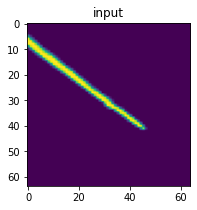

Translation
predicted parameter(s) = [-0.6840111017227173, -0.10673658549785614]


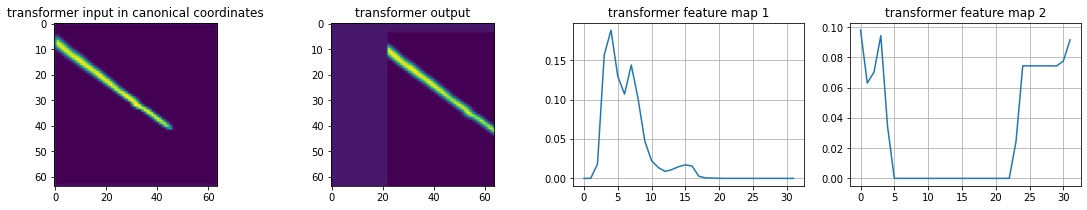

Rotation
predicted parameter(s) = [-3.705819845199585]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


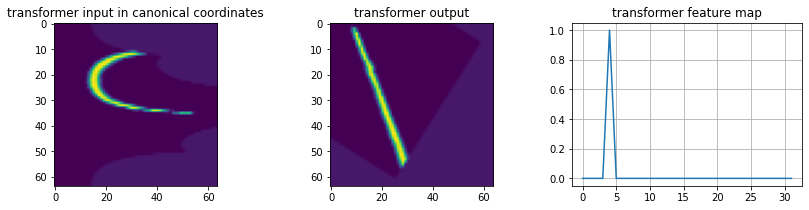

Scale
predicted parameter(s) = [0.5601269006729126]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


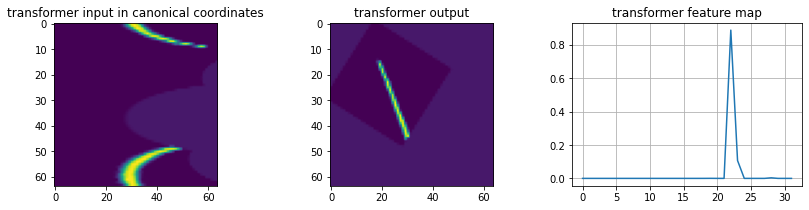

ReflectionX
predicted parameter(s) = [0.5945031642913818]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


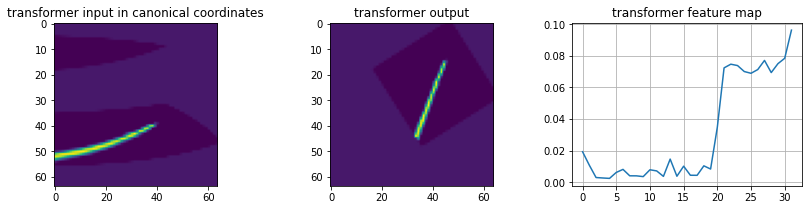

ShearX
predicted parameter(s) = [0.5327117443084717]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


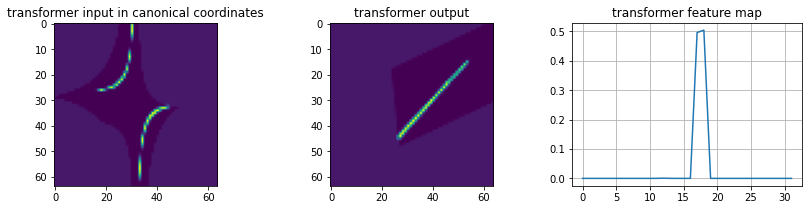

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


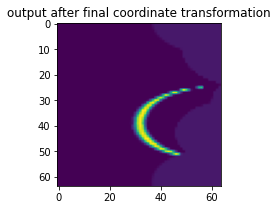

Actual Digit = tensor(9)
Predicted Digit = 9


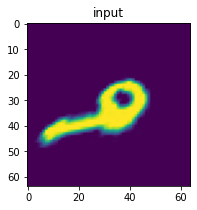

Translation
predicted parameter(s) = [-0.2730746567249298, -0.4366081655025482]


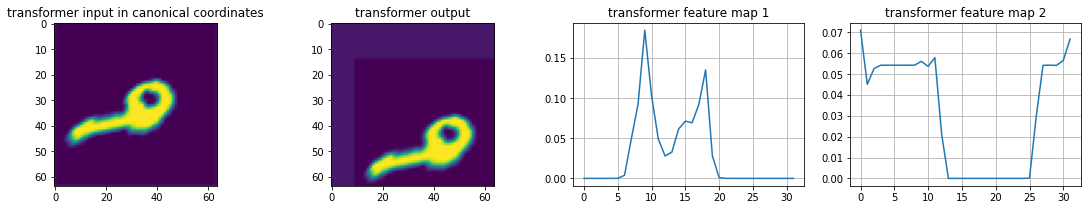

Rotation
predicted parameter(s) = [-1.3124879598617554]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


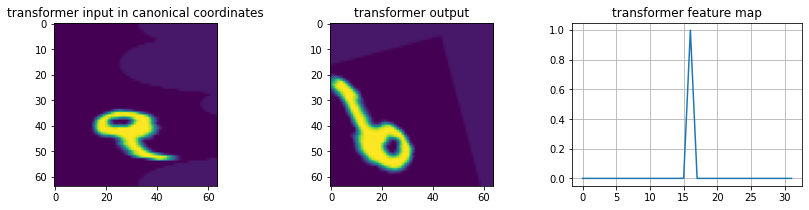

Scale
predicted parameter(s) = [0.8858646750450134]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


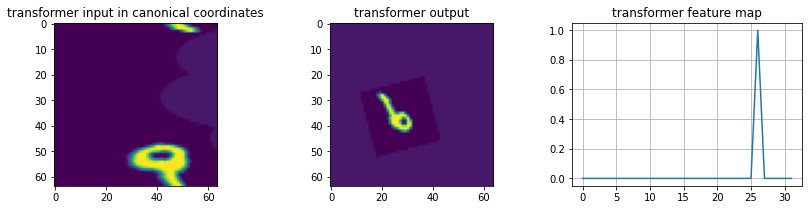

ReflectionX
predicted parameter(s) = [0.6393944025039673]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


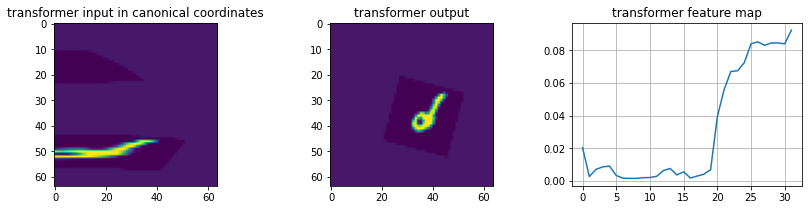

ShearX
predicted parameter(s) = [0.19952334463596344]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


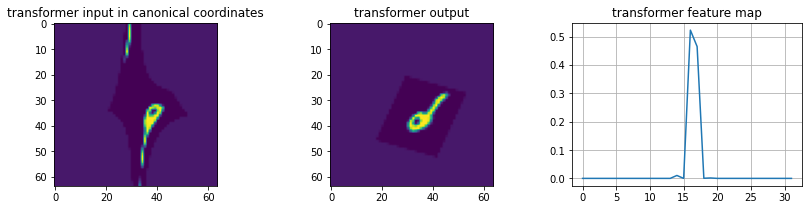

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


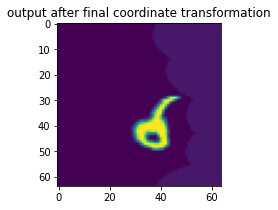

Actual Digit = tensor(8)
Predicted Digit = 8


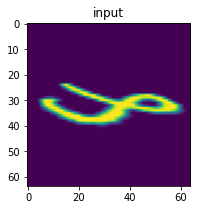

Translation
predicted parameter(s) = [0.20682388544082642, -0.3351701498031616]


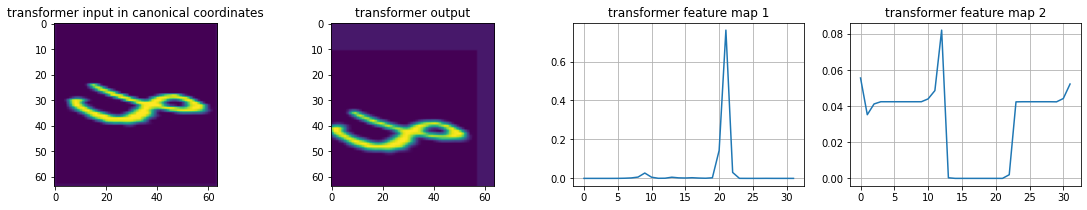

Rotation
predicted parameter(s) = [-1.1127593517303467]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


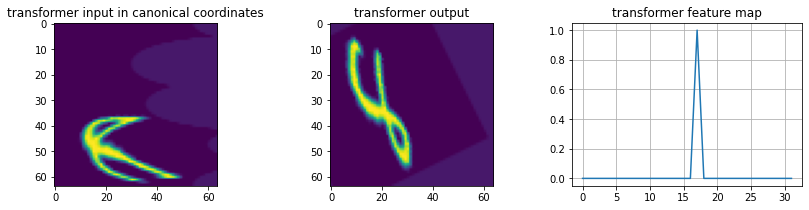

Scale
predicted parameter(s) = [0.5447546243667603]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


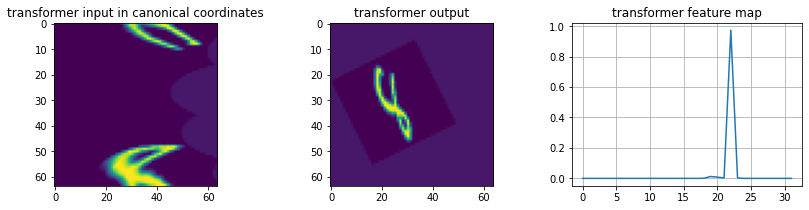

ReflectionX
predicted parameter(s) = [0.5555950403213501]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


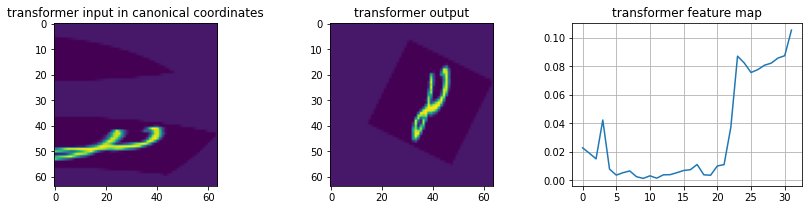

ShearX
predicted parameter(s) = [0.05771711468696594]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


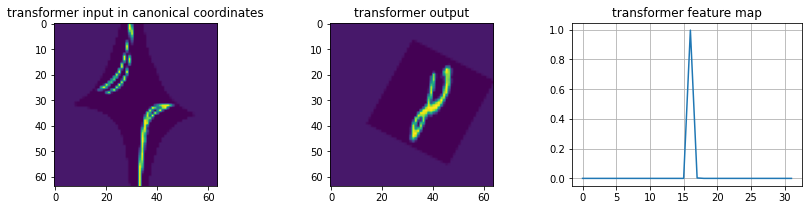

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2705: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


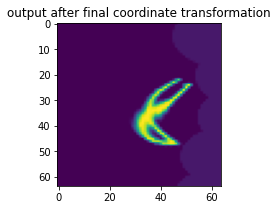

In [92]:
for i in range(3):
  idx = np.random.randint(len(mnist_data))
  prob = mnist_model.predict(mnist_data[idx][0])
  values, indices = prob.max(0)
  print('Actual Digit =', mnist_data[idx][1])
  print('Predicted Digit =', indices.item())
  visualize_transformation(
      mnist_data[idx][0], 
      mnist_model)